# 🎬 Netflix Dataset - Data Cleaning & Exploratory Data Analysis (EDA)

## 📖 Introduction
Netflix is one of the world’s leading streaming platforms. This project explores and analyzes the Netflix Titles Dataset to uncover insights about its content — such as genre distribution, release trends, ratings, and country contributions.

The dataset was sourced from [Kaggle: Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows).

## 🎯 Objectives
- Clean and preprocess the dataset to handle missing and inconsistent values  
- Explore key statistics and distributions across content type, country, genre, and release year  
- Visualize major patterns using Matplotlib and Seaborn  
- Summarize insights that describe Netflix’s content strategy  

## 🧰 Tools Used
Python | Pandas | NumPy | Matplotlib | Seaborn | Jupyter Notebook


## 📥 Step 1: Import Libraries and Load Dataset

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''#we use it to not see trivial warnings in the code lines.
import warnings
warnings.filterwarnings('ignore')'''

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

#Load dataset
df = pd.read_csv('../data/netflix_titles.csv', encoding='latin1')

#Preview of first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 📊 Step 2: Data Overview
Let's explore the dataset to understand its structure, data types, and missing values.

In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

### Removing Superfluous Columns
removing Unnamed columns as it does not have any data

In [13]:
# Columns from index 12 and afterwards are all Unnamed and Blank columns
df.drop(df.columns[12:], axis=1, inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info() #Check data types & null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [ ]:
df.isnull().sum() #Missing value summary

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [19]:
df.nunique() #Unique value count

show_id         8809
type               2
title           8806
director        4529
cast            7694
country          748
date_added      1768
release_year      75
rating            18
duration         220
listed_in        516
description     8777
dtype: int64

✅ **Observations:**
- The dataset contains 8,800+ rows and 12 columns.
- Missing values exist in `country`, `rating`, `duration`, `director`, `cast`, `country` and `date_added`
    -  `director`, `cast` and `country` has significant amount of missing values
    -  `country`, `rating` and `date_added` has very less missing values
- `date_added` is in object format and should be converted to datetime.
- 8809 Unique `show_id` but 8806 Unique `title`
- The `duration` column contains mixed information:
    - For **Movies**, it shows runtime in minutes (e.g., "90 min")
    - For **TV Shows**, it indicates number of seasons (e.g., "2 Seasons")


## 🧹 Step 3: Data Cleaning
We'll handle missing values, duplicates, and incorrect data types to make the dataset consistent and analysis-ready.

## 🧠 Data Imputation Strategy

Based on the missing value analysis, the following columns contain missing values:  
`rating`, `duration`, `date_added`, `cast`, `country`, and `director`.

To maintain data integrity while avoiding unnecessary row drops, we apply a **context-aware imputation strategy** — balancing realism with analytical usefulness.

---
### 🧹 Missing Value Overview & Strategy

| Column | Missing % | Chosen Imputation | Reasoning |
|:--------|:-----------|:------------------|:-----------|
| **rating** | < 2% | `"Not Rated"` | Categorical field; use neutral placeholder instead of guessing to avoid bias. |
| **duration** | < 2% | `"Unknown"` | Low missingness; consistent placeholder for readability. |
| **date_added** | < 2% | Synthetic date using `release_year` | Contextual fill since release year is known; ensures temporal consistency. |
| **cast** | < 10% | `"Not Available"` | Descriptive placeholder to preserve structure. |
| **country** | < 10% | `"Unknown"` | Important for grouping; keeps all rows valid for analysis. |
| **director** | ~30% | `"Unknown"` | High missingness but categorical; safe to fill with neutral value for completeness. |

In [25]:
#Handling the missing textual data
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

### 📏 Note on `duration` Feature Engineering

The `duration` column in this dataset contains mixed-format information:
- **Movies** → runtime in minutes (e.g., "120 min")  
- **TV Shows** → number of seasons (e.g., "2 Seasons")  

For Exploratory Data Analysis (EDA), this column is kept as-is for descriptive insights.  
However, in a **feature engineering or modeling context**, it can be split into two numeric columns:
- `duration_minutes` → extracted from Movie entries  
- `num_seasons` → extracted from TV Show entries  

This separation enables quantitative analysis of runtime or series length while preserving the original categorical meaning.

In [26]:
df['duration'].fillna('Unknown', inplace=True) #I will doing EDA

### 🗓️ Handling Missing `date_added` Values

The `date_added` column represents the date a title was added to Netflix, while the `release_year` column indicates when it was originally released.

Initially, one might consider filling missing `date_added` values with the **mode** (most frequent date).  
However, this approach would **cluster many records around a single timestamp**, which can distort time-based trend analysis — especially when visualizing the number of titles added per year.

To maintain temporal consistency, missing `date_added` values are imputed using the **release year** of each title.  
Each missing entry is assigned a synthetic date as **January 1st of its release year** (`YYYY-01-01`).

This ensures:
- The chronological order of titles remains realistic.  
- No artificial peaks are introduced into yearly trends.  
- Time-series visualizations remain interpretable and consistent.

In [28]:
# Convert 'date_added' from string to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Check how many missing after conversion
print("Missing after conversion:", df['date_added'].isna().sum())

# Fill missing values using release_year-based synthetic dates
mask = df['date_added'].isna()
df.loc[mask, 'date_added'] = pd.to_datetime(df.loc[mask, 'release_year'].astype(str) + '-01-01')

print(f"Filled {mask.sum()} missing dates using release_year.")

Missing after conversion: 98
Filled 98 missing dates using release_year.


In [29]:
# --- Handle Duplicates ---
duplicates = df[df.duplicated(subset='title', keep=False)] #first checking duplicate is there or not
print(f"Duplicate titles found: {duplicates['title'].nunique()}")

Duplicate titles found: 3


In [30]:
# Since Duplicate found therefore droping only exact duplicate records
df.drop_duplicates(inplace=True)

In [31]:
# --- Clean Text Columns ---
df['title'] = df['title'].str.strip()
df['listed_in'] = df['listed_in'].str.lower().str.strip()
df['rating'] = df['rating'].str.upper().str.strip()

In [32]:
# --- Verify Missing Values After Cleaning ---
print("\nMissing values after cleaning:")
print(df.isnull().sum())
# --- Export Cleaned Dataset ---
df.to_csv('../cleaned_data/cleaned_netflix_data.csv', index=False)
print("✅ Cleaned data saved successfully at '../cleaned_data/cleaned_netflix_data.csv'")


Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
✅ Cleaned data saved successfully at '../cleaned_data/cleaned_netflix_data.csv'


In [35]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6473,s6474,Movie,Chitty Chitty Bang Bang,Ken Hughes,"Dick Van Dyke, Sally Ann Howes, Lionel Jeffrie...","United Kingdom, United States",2020-01-01,1968,G,146 min,"children & family movies, classic movies, come...",Quirky inventor Caractacus Potts and his famil...
2651,s2652,TV Show,Absurd Planet,Unknown,Afi Ekulona,United States,2020-04-22,2020,TV-PG,1 Season,"docuseries, science & nature tv, tv comedies",A cast of quirky critters and Mother Nature he...
7786,s7787,TV Show,Power Rangers: Megaforce,Unknown,"Andrew M. Gray, Ciara Hanna, John Mark Louderm...",United States,2016-01-01,2013,TV-Y7,1 Season,kids' tv,When Earth is threatened by a massive alien in...
6926,s6927,Movie,Harlem Globetrotters: The Team That Changed th...,Unknown,"Chuck D., Harlem Globetrotters",Unknown,2019-11-01,2005,TV-14,55 min,"documentaries, sports movies",Relive the greatest moments of the Harlem Glob...
5299,s5300,TV Show,High Risk,Unknown,Not Available,United States,2017-09-01,1988,TV-PG,1 Season,"docuseries, reality tv","From scientists to snake handlers, this series..."


## 👁️ Visual Verification

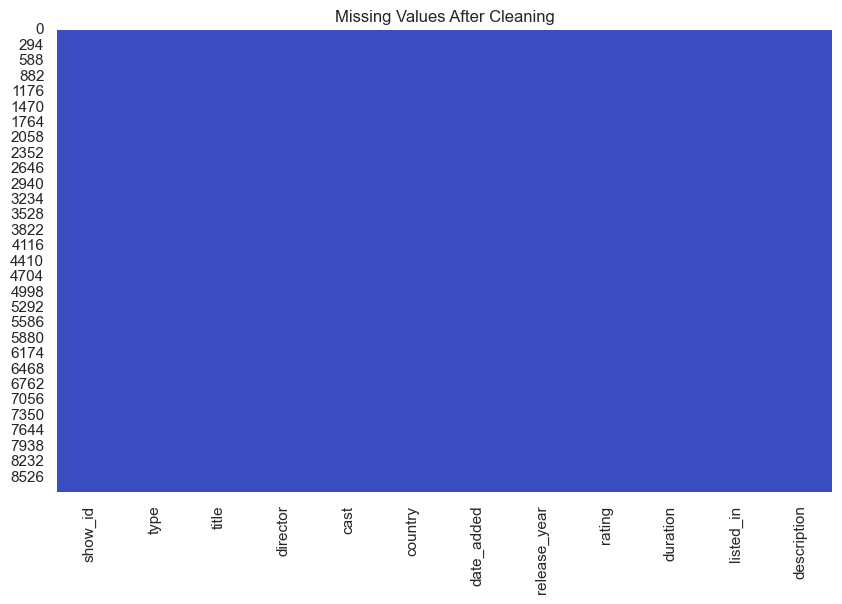

In [33]:
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values After Cleaning")
plt.show()

## 🧾 Data Cleaning Outcome

After applying the defined cleaning and imputation strategies, the dataset is now consistent, complete, and analysis-ready.

### ✅ Summary of Cleaning Steps
- Handled missing values in multiple columns using context-aware imputations:  
  - Filled `rating`, `duration`, and `date_added` (less than 2% missing) with logical placeholders or synthetic values.  
  - Replaced missing `cast` and `country` (under 10%) with descriptive placeholders.  
  - Filled missing `director` (~30%) with `"Unknown"` to maintain structure.  
- Converted `date_added` from object to datetime format.  
  - Used corresponding `release_year` to impute missing dates (e.g., `YYYY-01-01`) instead of mode for temporal consistency.  
- Removed duplicate records and normalized text fields (`title`, `listed_in`, `rating`) for case and spacing.  
- Verified zero remaining missing values post-cleaning.  
- Kept `duration` as-is for EDA since it holds meaningful categorical information for both Movies (`minutes`) and TV Shows (`seasons`).
---